In [328]:
import os
import pandas as pd
import numpy as np

#################
# Dataset loading
#################
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session.

df = pd.read_csv('./adult.csv')

In [329]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [330]:
df['income.bin'] = df['income'].map(lambda x: 1 if x == '>50K' else 0)

In [331]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income.bin
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [332]:
# Count '?' in each column
missing_counts = df.apply(lambda x: (x == '?').sum()).sort_values(ascending=False)

# Calculate percentage of '?' in each column
total_rows = len(df)
missing_percentages = (missing_counts / total_rows * 100).round(2)

# Combine counts and percentages
missing_analysis = pd.DataFrame({
    'Count': missing_counts,
    'Percentage': missing_percentages
})

In [333]:
# Filter only columns that have '?' values
missing_analysis = missing_analysis[missing_analysis['Count'] > 0]

print("Analysis of '?' values in each column:")
print(missing_analysis)

# Count rows with at least one '?'
rows_with_missing = df.apply(lambda x: x == '?', axis=1).any(axis=1).sum()
print(f"\nTotal rows with at least one '?' value: {rows_with_missing}")
print(f"Percentage of rows with at least one '?' value: {(rows_with_missing/total_rows*100):.2f}%")

# Optional: Show some example rows with '?' values
print("\nExample rows containing '?' values:")
print(df[df.apply(lambda x: (x == '?').any(), axis=1)].head())

Analysis of '?' values in each column:
                Count  Percentage
occupation       1843        5.66
workclass        1836        5.64
native.country    583        1.79

Total rows with at least one '?' value: 2399
Percentage of rows with at least one '?' value: 7.37%

Example rows containing '?' values:
    age workclass  fnlwgt     education  education.num marital.status  \
0    90         ?   77053       HS-grad              9        Widowed   
2    66         ?  186061  Some-college             10        Widowed   
9    41   Private   70037  Some-college             10  Never-married   
14   51         ?  172175     Doctorate             16  Never-married   
18   22   Private  119592    Assoc-acdm             12  Never-married   

           occupation   relationship   race     sex  capital.gain  \
0                   ?  Not-in-family  White  Female             0   
2                   ?      Unmarried  Black  Female             0   
9        Craft-repair      Unmarried  Whit

In [334]:
df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [335]:
import math
baseline = math.pow((24720/(24720+7841)), 2) + math.pow((7841/(24720+7841)), 2)
print(f"Baseline Accuracy: {baseline:.2%}")

Baseline Accuracy: 63.44%


0.33515395269094217 0.0


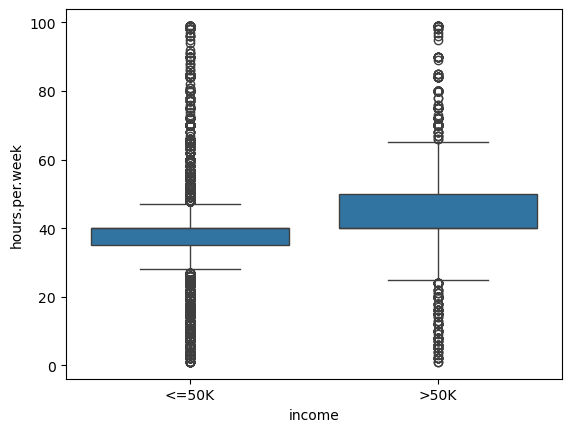

income
<=50K    38.840210
>50K     45.473026
Name: hours.per.week, dtype: float64

In [336]:
# Using pandas and scipy
import pandas as pd
import scipy.stats as stats

# Point-biserial correlation
# Convert income to binary (0 for ≤50K, 1 for >50K)
correlation, p_value = stats.pointbiserialr((df['income'] == '>50K'), df['education.num'])
print(correlation, p_value)

# Visualization using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot
sns.boxplot(x='income', y='hours.per.week', data=df)
plt.show()

# Or calculate mean education years by income group
df.groupby('income')['hours.per.week'].mean()

This boxplot reveals several important insights about the relationship between education level (education.num) and income in the Adult Census Income dataset:

1. Clear Positive Relationship:
- People earning >50K tend to have higher education levels (median around 12 years) compared to those earning ≤50K (median around 9-10 years)
- The orange box (>50K) is positioned notably higher than the blue box (≤50K)

2. Distribution Characteristics:
- Higher income group (>50K):
  - Larger box (IQR) suggesting more variability in education levels
  - Median around 12 years (likely equivalent to completing high school)
  - 25th percentile appears to be around 10 years
  - 75th percentile appears to be around 13 years

- Lower income group (≤50K):
  - Smaller box indicating less variability in education
  - Median around 9-10 years
  - More outliers (black dots) at both extremes

3. Outliers:
- The ≤50K group has more outliers, particularly at higher education levels (16 years likely representing advanced degrees)
- Both groups have some outliers at lower education levels

4. Overlap:
- There is considerable overlap between the two distributions, indicating that education alone isn't a perfect predictor of income
- However, the clear difference in medians suggests education is still an important factor

This visualization suggests education level is a relevant feature for predicting income, though not a deterministic one. It would likely be valuable to keep this feature in your model.

In [337]:
# For a simpler version with just percentages:
def create_simple_crosstab(df, feature, target='income'):
    # Count table
    counts = pd.crosstab(df[feature], df[target])
    
    # Add row totals
    counts['Total'] = counts.sum(axis=1)
    
    # Calculate percentages
    percentages = counts.div(counts['Total'], axis=0) * 100
    
    # Format the table
    formatted_table = pd.DataFrame()
    
    for col in counts.columns:
        if col != 'Total':
            formatted_table[f'{col}'] = counts[col].astype(str) + ' (' + percentages[col].round(1).astype(str) + '%)'
        else:
            formatted_table[col] = counts[col]
    
    return formatted_table

categorical_features = ['workclass', 'education', 'education.num', 'marital.status', 'occupation', 
                          'relationship', 'race', 'sex', 'native.country']
for feature in categorical_features:
    simple_result = create_simple_crosstab(df, feature)
    print(simple_result)
    print("----------------\n")

                          <=50K          >50K  Total
workclass                                           
?                  1645 (89.6%)   191 (10.4%)   1836
Federal-gov         589 (61.4%)   371 (38.6%)    960
Local-gov          1476 (70.5%)   617 (29.5%)   2093
Never-worked         7 (100.0%)      0 (0.0%)      7
Private           17733 (78.1%)  4963 (21.9%)  22696
Self-emp-inc        494 (44.3%)   622 (55.7%)   1116
Self-emp-not-inc   1817 (71.5%)   724 (28.5%)   2541
State-gov           945 (72.8%)   353 (27.2%)   1298
Without-pay         14 (100.0%)      0 (0.0%)     14
----------------

                     <=50K          >50K  Total
education                                      
10th           871 (93.4%)     62 (6.6%)    933
11th          1115 (94.9%)     60 (5.1%)   1175
12th           400 (92.4%)     33 (7.6%)    433
1st-4th        162 (96.4%)      6 (3.6%)    168
5th-6th        317 (95.2%)     16 (4.8%)    333
7th-8th        606 (93.8%)     40 (6.2%)    646
9th            

# Create binary country feature
df['country_binary'] = df['native.country'].map(lambda x: 'United-States' if x == 'United-States' else 'Non United-States')

# Create crosstab
counts = pd.crosstab(df['country_binary'], df['income'])

# Calculate percentages
percentages = pd.crosstab(df['country_binary'], df['income'], normalize='index') * 100

# Add total counts
counts['Total'] = counts.sum(axis=1)

# Format the table
formatted_table = pd.DataFrame()

for col in counts.columns:
    if col != 'Total':
        formatted_table[f'{col}'] = counts[col].astype(str) + ' (' + percentages[col].round(1).astype(str) + '%)'
    else:
        formatted_table[col] = counts[col]

print(formatted_table)

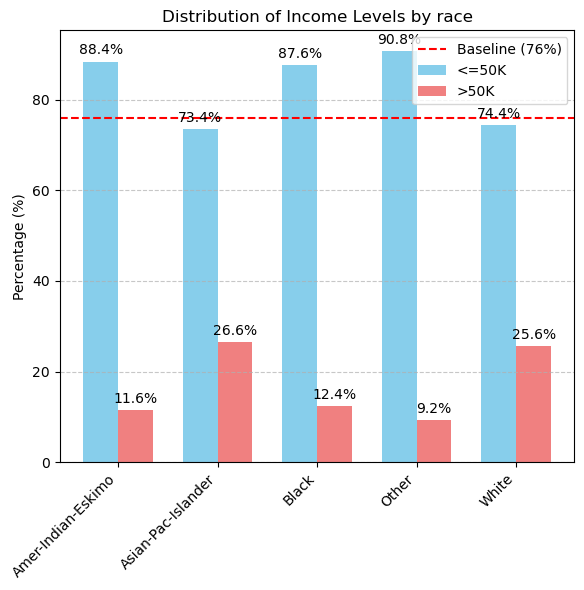

In [338]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_category_distributions(df, feature, target='income', baseline=76, figsize=(12, 6)):
    """
    Create a bar plot showing the distribution of target classes within each category
    of the specified feature, with a baseline reference line.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The input DataFrame containing the feature and target columns
    feature : str
        The name of the categorical feature to analyze
    target : str, default='income'
        The name of the target column
    baseline : float, default=76
        The baseline percentage for the majority class (<=50K)
    figsize : tuple, default=(12, 6)
        The figure size (width, height)
        
    Returns:
    --------
    fig, ax : matplotlib figure and axis objects
    """
    # Create crosstab
    ct = pd.crosstab(df[feature], df[target], normalize='index') * 100
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize)
    
    # Get x positions for bars
    x = np.arange(len(ct.index))
    width = 0.35
    
    # Plot bars
    bars1 = ax.bar(x - width/2, ct.iloc[:, 0], width, 
                   label=ct.columns[0], color='skyblue')
    bars2 = ax.bar(x + width/2, ct.iloc[:, 1], width,
                   label=ct.columns[1], color='lightcoral')
    
    # Add baseline
    ax.axhline(y=baseline, color='red', linestyle='--', 
               label=f'Baseline ({baseline}%)')
    
    # Customize plot
    ax.set_ylabel('Percentage (%)')
    ax.set_title(f'Distribution of Income Levels by {feature}')
    ax.set_xticks(x)
    ax.set_xticklabels(ct.index, rotation=45, ha='right')
    ax.legend()
    
    # Add value labels on bars
    def autolabel(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.1f}%',
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3),  # 3 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom')
    
    autolabel(bars1)
    autolabel(bars2)
    
    # Add grid for better readability
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    return fig, ax

# Example usage:
fig, ax = plot_category_distributions(df, 'race', baseline=76, figsize=(6, 6))
plt.show()

In [339]:
import pandas as pd
from scipy.stats import chi2_contingency

def analyze_categorical_importance(df, target='income'):
    categorical_features = ['workclass', 'education', 'marital.status', 'occupation', 
                          'relationship', 'race', 'sex', 'native.country']
    
    results = []
    for feature in categorical_features:
        # Create contingency table
        contingency = pd.crosstab(df[feature], df[target])
        
        # Perform chi-square test
        chi2, p_value, dof, expected = chi2_contingency(contingency)
        
        # Calculate Cramer's V (normalized measure of association)
        n = contingency.sum().sum()
        min_dim = min(contingency.shape) - 1
        cramer_v = np.sqrt(chi2 / (n * min_dim))
        
        results.append({
            'feature': feature,
            'chi2': chi2,
            'p_value': p_value,
            'cramer_v': cramer_v
        })
    
    return pd.DataFrame(results).sort_values('cramer_v', ascending=False)
    

In [340]:
# Run all analyses
categorical_importance = analyze_categorical_importance(df.drop(['income.bin'], axis=1))

# Print results
print("Categorical Feature Analysis (Cramer's V):")
print(categorical_importance)

Categorical Feature Analysis (Cramer's V):
          feature         chi2        p_value  cramer_v
4    relationship  6699.076897   0.000000e+00  0.453585
2  marital.status  6517.741654   0.000000e+00  0.447404
1       education  4429.653302   0.000000e+00  0.368838
3      occupation  4031.974280   0.000000e+00  0.351892
6             sex  1517.813409   0.000000e+00  0.215904
0       workclass  1045.708600  2.026505e-220  0.179208
5            race   330.920431   2.305961e-70  0.100812
7  native.country   317.230386   2.211386e-44  0.098705


In [341]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def pca_feature_analysis(df, target='income'):
    # Separate numeric columns
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    X = df[numeric_columns].drop(target, axis=1) if target in numeric_columns else df[numeric_columns]
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    
    # Calculate explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
    
    # Get component loadings
    loadings = pd.DataFrame(
        pca.components_.T,
        columns=[f'PC{i+1}' for i in range(len(pca.components_))],
        index=X.columns
    )
    
    # Plot explained variance
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(explained_variance_ratio) + 1), 
             cumulative_variance_ratio, 'bo-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('Explained Variance vs Number of Components')
    plt.grid(True)
    plt.show()
    
    # Plot feature loadings for first two components
    plt.figure(figsize=(10, 6))
    sns.heatmap(loadings.iloc[:, :2], annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Loadings (First Two Principal Components)')
    plt.show()
    
    return {
        'explained_variance_ratio': explained_variance_ratio,
        'cumulative_variance_ratio': cumulative_variance_ratio,
        'loadings': loadings
    }

# For categorical features, we need to encode them first
def pca_with_categorical(df, target='income'):
    # Create copy of dataframe
    df_encoded = df.copy()
    
    # Encode categorical variables using one-hot encoding
    categorical_columns = df.select_dtypes(include=['object']).columns
    df_encoded = pd.get_dummies(df_encoded, columns=categorical_columns)
    
    # Remove target variable if present
    if target in df_encoded.columns:
        df_encoded = df_encoded.drop(target, axis=1)
    
    # Now perform PCA analysis
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_encoded)
    
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    
    # Create loadings dataframe
    loadings = pd.DataFrame(
        pca.components_.T,
        columns=[f'PC{i+1}' for i in range(len(pca.components_))],
        index=df_encoded.columns
    )
    
    # Plot top features for first two components
    def plot_top_features(loadings, n_features=10):
        plt.figure(figsize=(15, 6))
        
        # Plot for PC1
        plt.subplot(1, 2, 1)
        pc1_loadings = loadings['PC1'].abs().sort_values(ascending=False)[:n_features]
        pc1_loadings.plot(kind='bar')
        plt.title('Top Features in PC1')
        plt.xticks(rotation=45, ha='right')
        
        # Plot for PC2
        plt.subplot(1, 2, 2)
        pc2_loadings = loadings['PC2'].abs().sort_values(ascending=False)[:n_features]
        pc2_loadings.plot(kind='bar')
        plt.title('Top Features in PC2')
        plt.xticks(rotation=45, ha='right')
        
        plt.tight_layout()
        plt.show()
    
    plot_top_features(loadings)
    
    return {
        'explained_variance_ratio': pca.explained_variance_ratio_,
        'cumulative_variance_ratio': np.cumsum(pca.explained_variance_ratio_),
        'loadings': loadings
    }

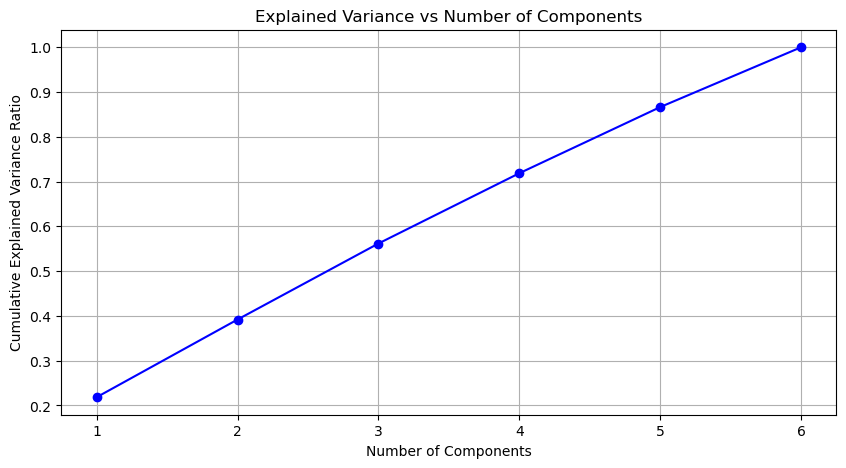

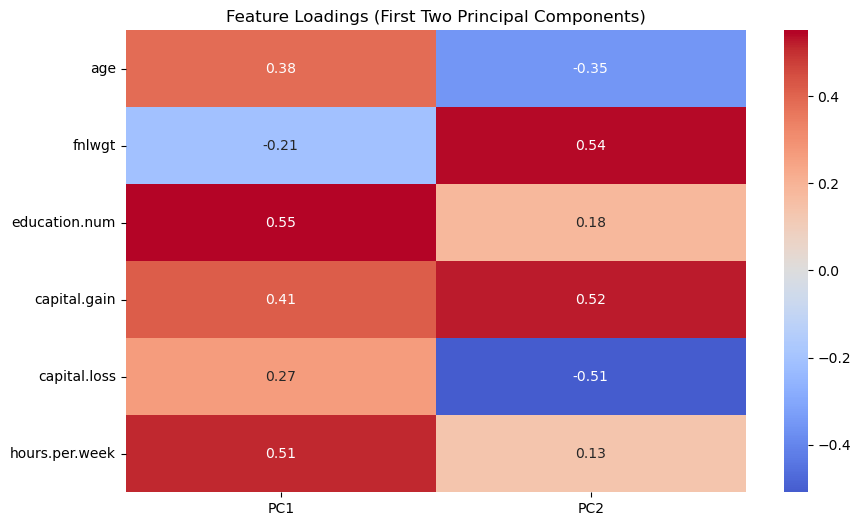

Variance explained by each component:
PC1: 0.218
PC2: 0.173
PC3: 0.170
PC4: 0.157
PC5: 0.148
PC6: 0.134


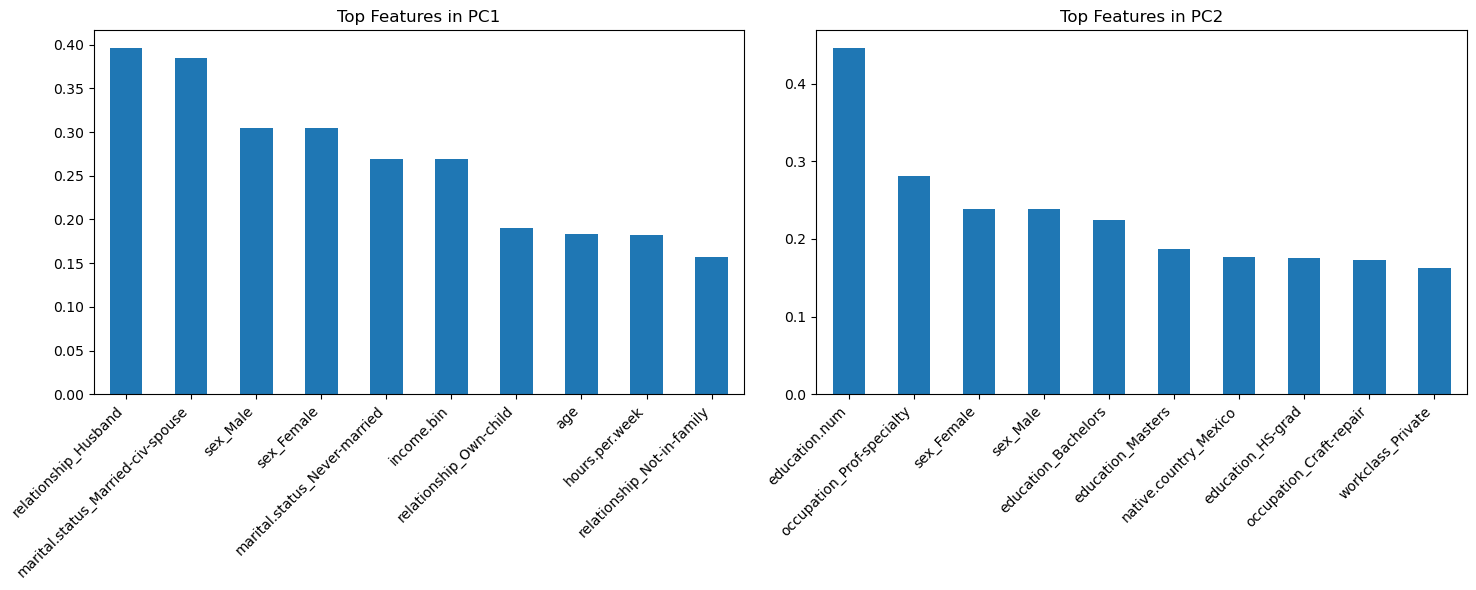


Top features in PC1:
relationship_Husband                 0.396601
marital.status_Married-civ-spouse    0.384815
sex_Male                             0.304540
sex_Female                           0.304540
marital.status_Never-married         0.269233
Name: PC1, dtype: float64


In [342]:
# For numeric features only
numeric_results = pca_feature_analysis(df.drop(['income.bin', 'income'], axis=1))  # Remove label column)

# Print variance explained by first few components
print("Variance explained by each component:")
for i, var in enumerate(numeric_results['explained_variance_ratio']):
    print(f"PC{i+1}: {var:.3f}")

# For all features including categorical (after encoding)
full_results = pca_with_categorical(df.drop('income', axis=1))  # Remove label column)

# Look at top features in first principal component
print("\nTop features in PC1:")
print(full_results['loadings']['PC1'].abs().sort_values(ascending=False).head())

In [343]:
def analyze_feature_correlations(df, target='income', title='Feature Correlation Matrix'):
    # Calculate correlations
    corr_matrix = df.corr()
    
    # Plot correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

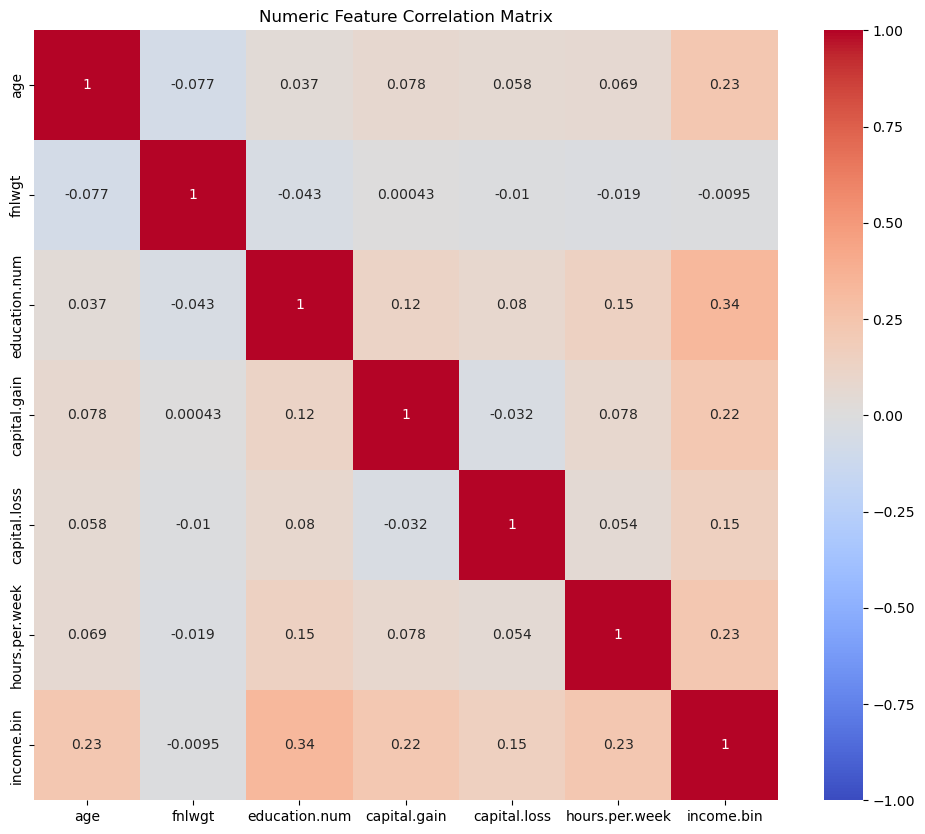

In [344]:
numeric_features = ['age', 'fnlwgt', 'education.num', 'capital.gain', 
                   'capital.loss', 'hours.per.week', 'income.bin']
analyze_feature_correlations(df.replace('?', np.nan)[numeric_features], title='Numeric Feature Correlation Matrix')

In [345]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Sample dataset

# Prepare categorical columns for one-hot encoding
categorical_columns = ['workclass', 'marital.status', 'occupation', 
                      'relationship', 'race', 'sex']

# Create ColumnTransformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop=None, sparse_output=False), categorical_columns)
    ],
    remainder='passthrough'
)

# Fit and transform the data
X = preprocessor.fit_transform(df[categorical_columns + ['income.bin']])

# Create a new DataFrame with encoded features
feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(
    X, 
    columns=list(feature_names) + ['income.bin']
)

In [346]:
# Calculate correlation with target
correlations = encoded_df.corr()['income.bin'].sort_values(ascending=False)

print("One-Hot Encoded Features:")
print(encoded_df.shape)
print("\nFeature Correlations with Target:")
print(correlations)

One-Hot Encoded Features:
(32561, 45)

Feature Correlations with Target:
income.bin                              1.000000
marital.status_Married-civ-spouse       0.444696
relationship_Husband                    0.401035
sex_Male                                0.215980
occupation_Exec-managerial              0.214861
occupation_Prof-specialty               0.185866
workclass_Self-emp-inc                  0.139467
relationship_Wife                       0.123264
race_White                              0.085224
workclass_Federal-gov                   0.059372
workclass_Local-gov                     0.033091
workclass_Self-emp-not-inc              0.030019
occupation_Protective-serv              0.028118
occupation_Tech-support                 0.025696
occupation_Sales                        0.023688
workclass_State-gov                     0.014843
marital.status_Married-AF-spouse        0.012061
race_Asian-Pac-Islander                 0.010543
occupation_Armed-Forces                -0.005

In [347]:
correlations[1:].abs().describe()

count    44.000000
mean      0.101595
std       0.102377
min       0.005044
25%       0.028570
50%       0.076292
75%       0.140314
max       0.444696
Name: income.bin, dtype: float64

In [348]:
filtered_corrs = correlations[1:-1].where(lambda x : abs(x) > 0.047763).dropna()

In [349]:
filtered_corrs

marital.status_Married-civ-spouse    0.444696
relationship_Husband                 0.401035
sex_Male                             0.215980
occupation_Exec-managerial           0.214861
occupation_Prof-specialty            0.185866
workclass_Self-emp-inc               0.139467
relationship_Wife                    0.123264
race_White                           0.085224
workclass_Federal-gov                0.059372
occupation_Farming-fishing          -0.051925
marital.status_Widowed              -0.064381
occupation_Machine-op-inspct        -0.069401
marital.status_Separated            -0.074386
workclass_?                         -0.078198
workclass_Private                   -0.078528
occupation_?                        -0.078583
relationship_Other-relative         -0.083716
occupation_Handlers-cleaners        -0.087265
race_Black                          -0.089089
occupation_Adm-clerical             -0.089986
marital.status_Divorced             -0.126995
relationship_Unmarried            

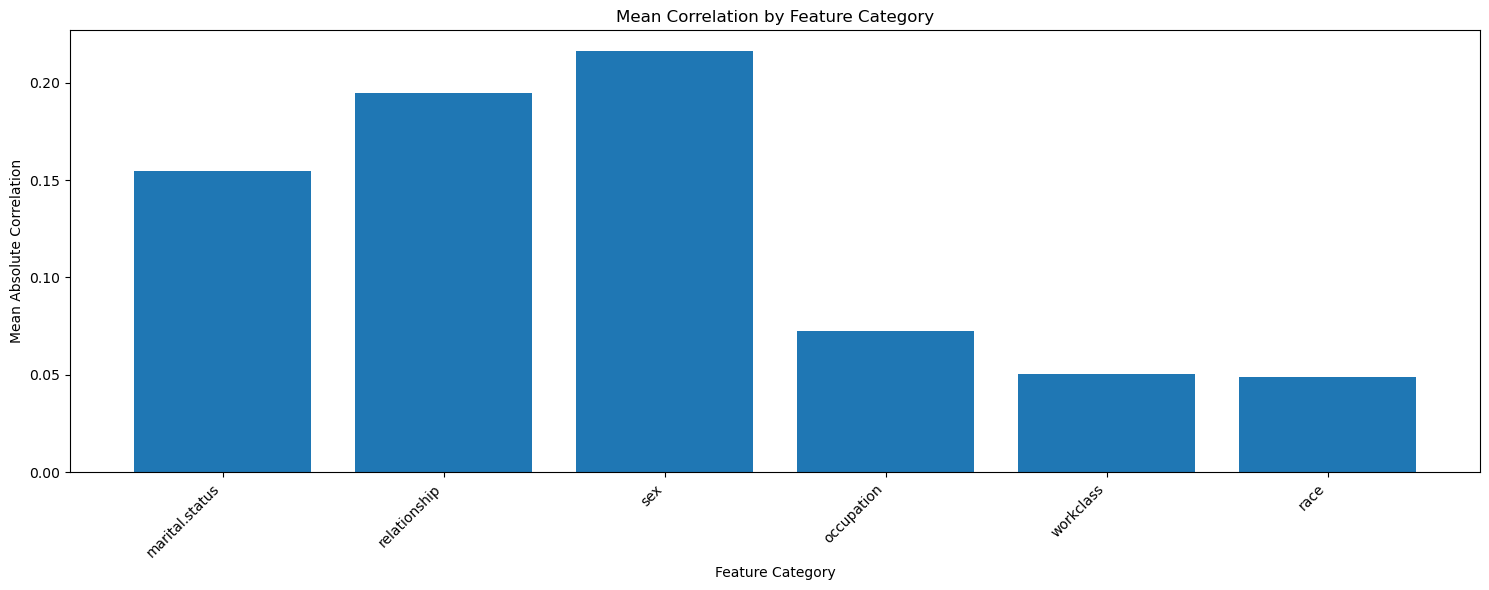

In [350]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

abs_correlations = correlations.abs()
# Assuming 'correlations' is from the previous code
# Extract categories and values
categories = [col.split('_')[0] for col in abs_correlations.index if '_' in col]
values = [val for col, val in abs_correlations.items() if '_' in col]

# Create unique categories while preserving order
unique_categories = list(dict.fromkeys(categories))

# Aggregate values for each category (mean correlation)
category_values = {}
for cat, val in zip(categories, values):
    if cat not in category_values:
        category_values[cat] = []
    category_values[cat].append(val)

mean_correlations = {cat: np.mean(vals) for cat, vals in category_values.items()}

# Plot
plt.figure(figsize=(15, 6))
plt.bar(
    list(mean_correlations.keys()), 
    list(mean_correlations.values())
)
plt.title('Mean Correlation by Feature Category')
plt.xlabel('Feature Category')
plt.ylabel('Mean Absolute Correlation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

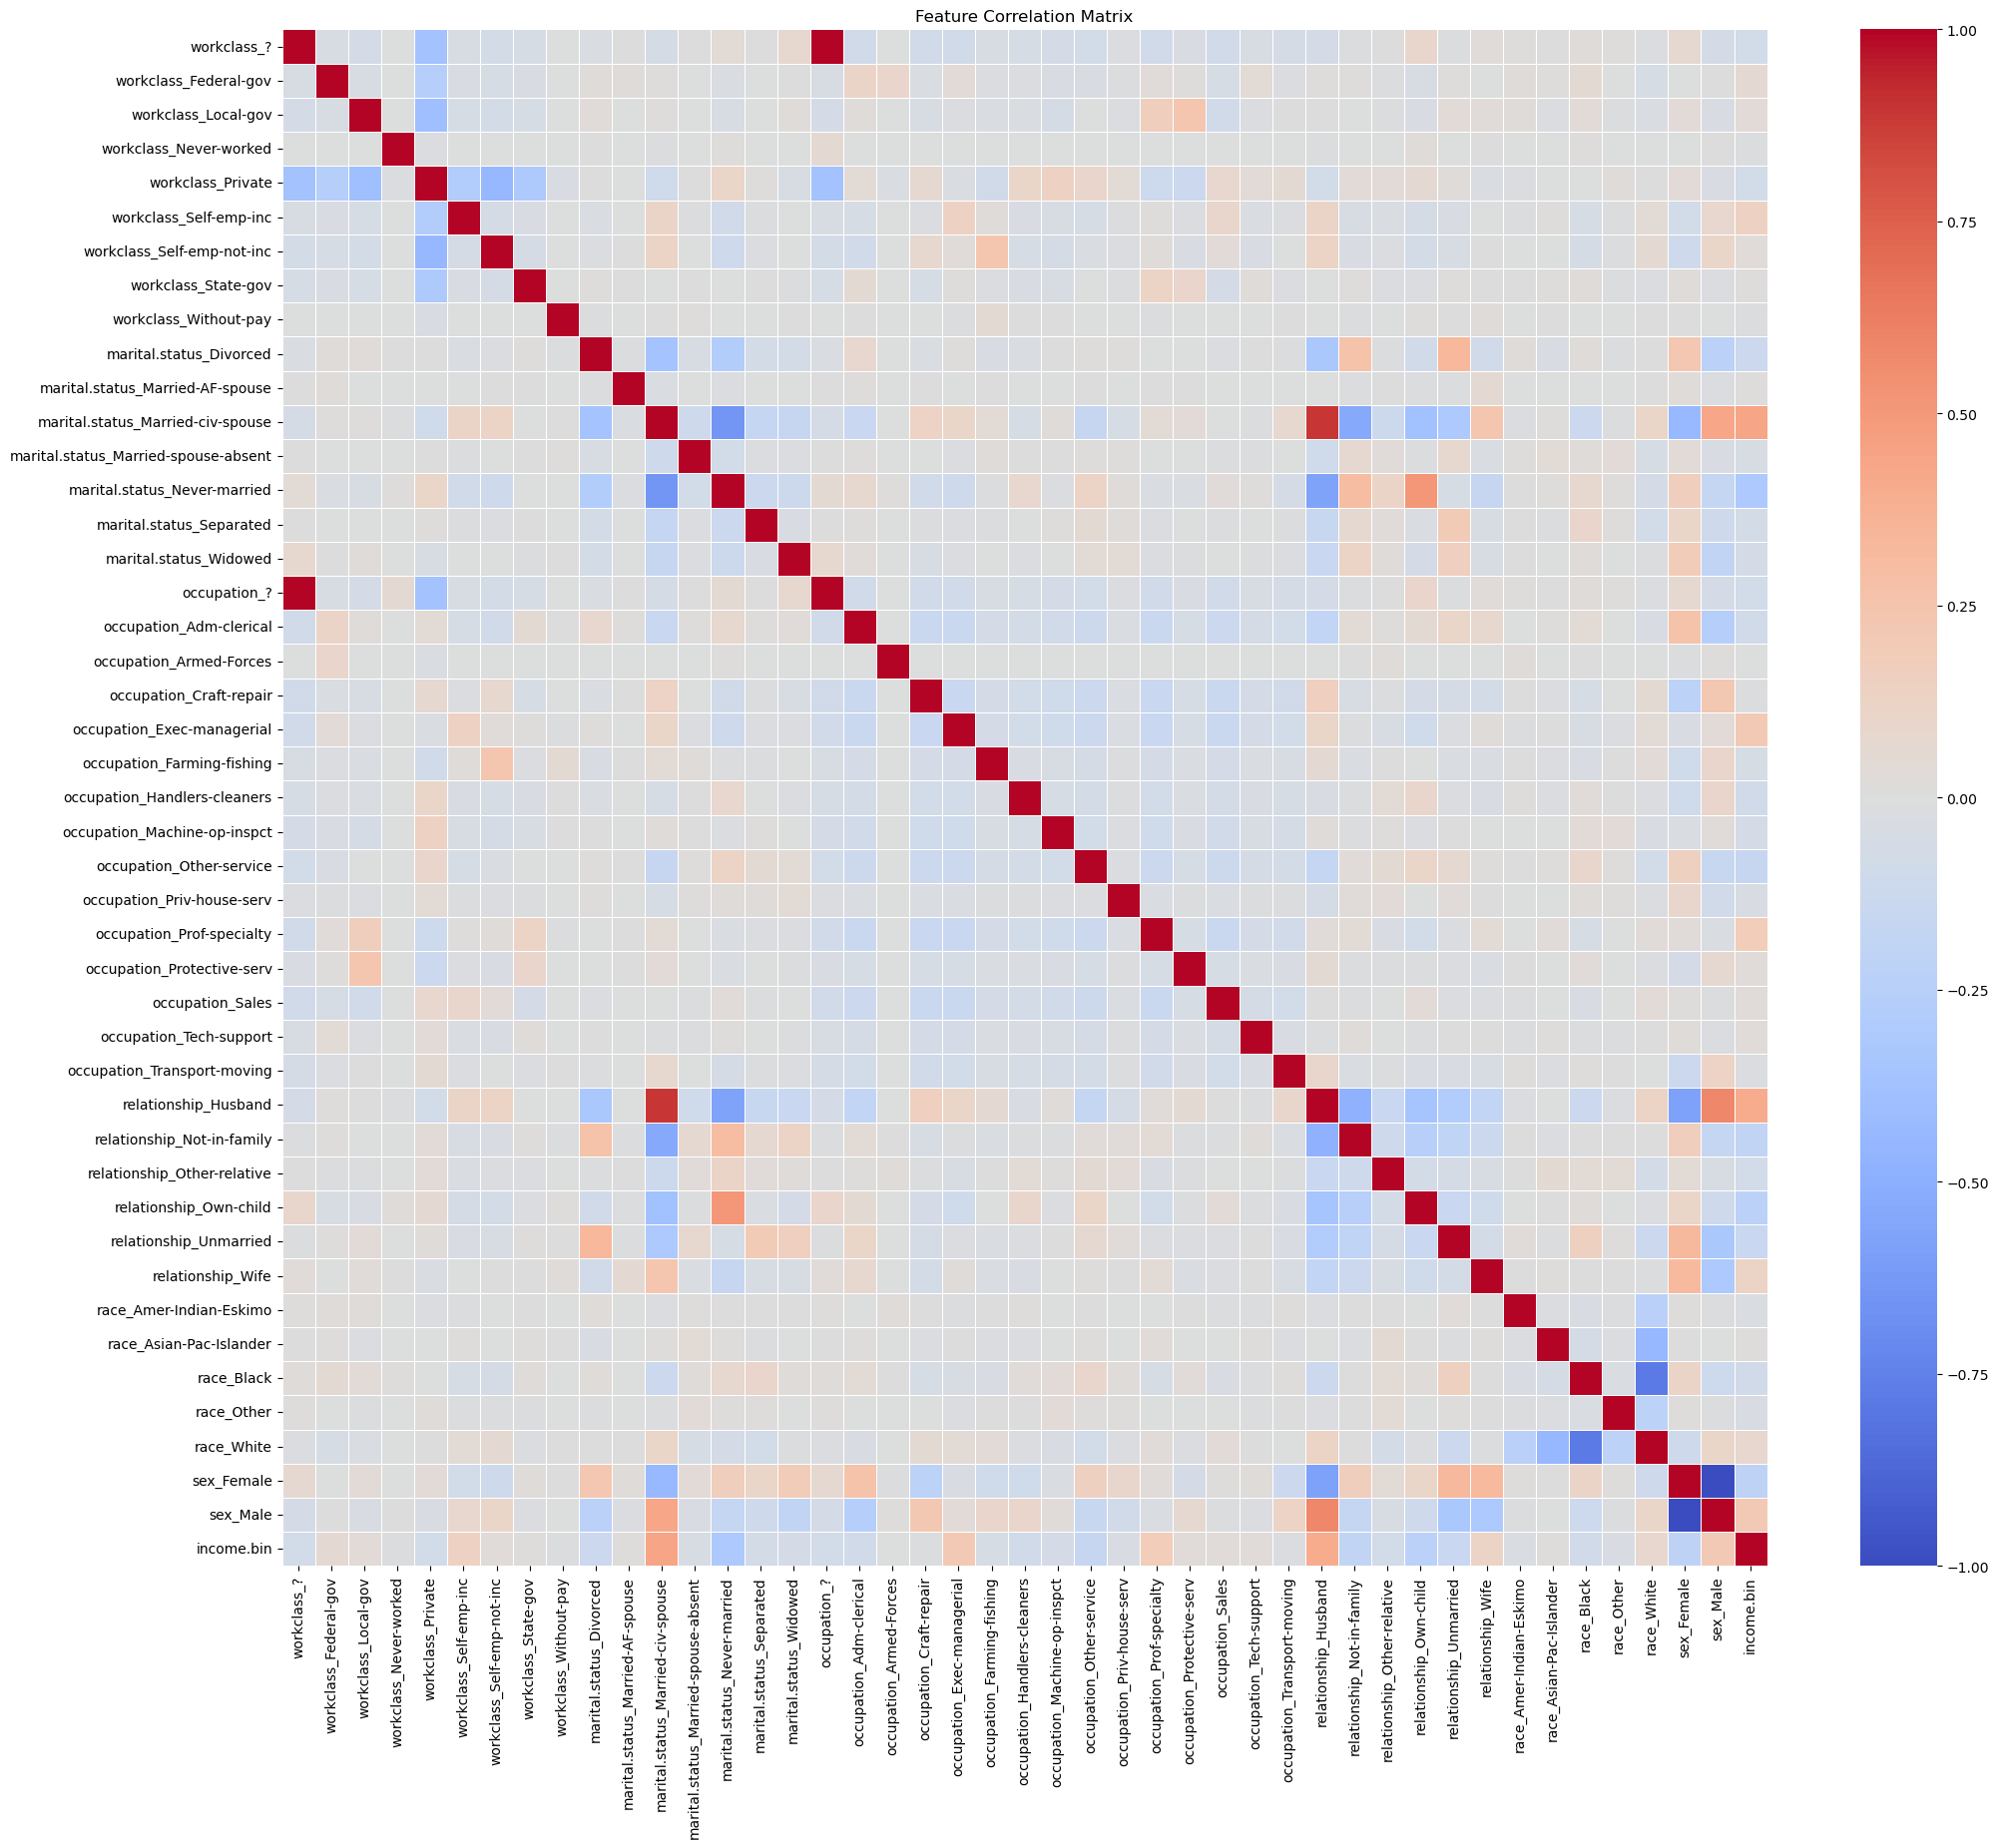

In [351]:
plt.figure(figsize=(24, 20))
sns.heatmap(encoded_df.corr(), annot=False, cmap='coolwarm', center=0, linewidths=.5)
plt.title('Feature Correlation Matrix')
plt.show()